In [1]:
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline
models = [r'f:\sd_models\ghostmix_v2',
          r'f:\sd_models\aesteticmix',
          r'f:\sd_models\revAnimated_v122']
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(models[0], safety_checker=None, torch_dtype=torch.float16)
pipe = pipe.to(device)
from diffusers import DDIMScheduler as Scheduler

scheduler = Scheduler.from_config(pipe.scheduler.config)
pipe.scheduler = scheduler

f:\miniconda3\envs\stable\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


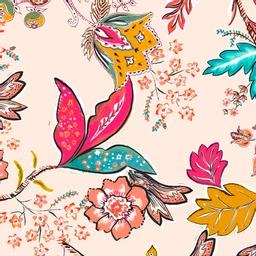

In [7]:
init_image = Image.open("input_image.png").convert("RGB")

tile_size = 256
cropped_image = init_image.crop((0, 0, tile_size, tile_size))
cropped_image

  0%|          | 0/22 [00:00<?, ?it/s]

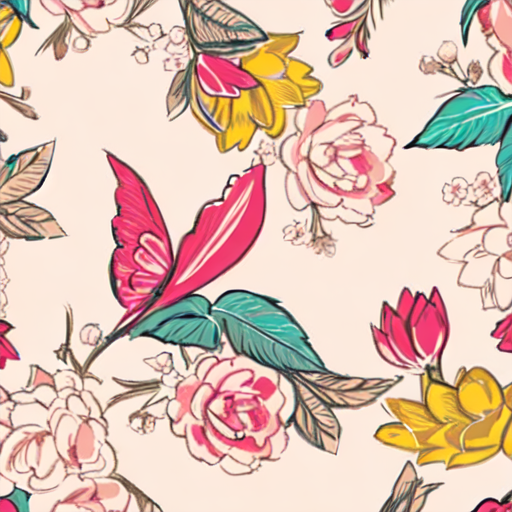

In [20]:
from diffusers import DPMSolverMultistepScheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

prompt = "(insanely detailed, sharp, crisp, masterpiece, top quality, best quality, official art, beautiful and aesthetic:1.2) a pattern of flowers on black background"
scale = 2
scaled_image = cropped_image.resize((cropped_image.width * scale, cropped_image.height * scale), Image.LANCZOS)
rendered_image = pipe(prompt=prompt, image=scaled_image, strength=0.45, guidance_scale=9, num_inference_steps= 50,
                negative_prompt="(watermark:1.6), watermark, text, username "
                ).images[0]

rendered_image.save("out3.png")
rendered_image

In [22]:
from diffusers import DPMSolverMultistepScheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

prompt = "(insanely detailed, illustration, masterpiece, top quality, best quality, official art, beautiful and aesthetic:1.2) a pattern of flowers on black background"
init_image = init_image.resize((1024, 1024), Image.LANCZOS)

image_width, image_height = init_image.size
tile_size = 256
scale = 2
overlap = 64
output_image = Image.new("RGB", (image_width * scale, image_height *scale))
for i in range(0, image_height - overlap, tile_size - overlap):
        for j in range(0, image_width - overlap, tile_size - overlap):
            box = (j, i, j + tile_size, i + tile_size)
            box = (j, i, j + tile_size, i + tile_size)
            tile = init_image.crop(box)
            tile = tile.resize((tile_size*scale, tile_size*scale), Image.LANCZOS)
            rendered_tile = pipe(prompt=prompt, image=tile, strength=0.45, guidance_scale=19, num_inference_steps= 70,
                negative_prompt="(watermark:1.6), watermark, text, username "
                ).images[0]
            output_image.paste(rendered_tile, (j*scale, i*scale))

output_image.save("out4.png")

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]